In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [105]:
#read in train and test data

train=pd.read_csv('train.csv')

test=pd.read_csv('test.csv')

In [106]:
train.head()

,pitch_uid,game_pk,game_date,pitcher,pitcher_name,batter,batter_name,pitch_type,release_speed,release_pos_x,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing
0,0,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",FF,95.2,2.19,...,0,0,0,Standard,Standard,144.0,0.0,-0.042,heart,0
1,1,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",FF,94.9,1.96,...,0,0,0,Standard,Standard,148.0,0.0,0.032,chase,0
2,2,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",SL,87.9,2.25,...,0,0,0,Standard,Standard,139.0,0.0,-0.060,chase,1
3,3,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",SL,88.2,2.44,...,0,0,0,Standard,Standard,132.0,0.0,0.035,waste,0
4,4,630099,2020-08-26,592662,"Ray, Robbie",641658,"Hampson, Garrett",FF,95.8,1.93,...,0,0,0,Standard,Standard,149.0,0.0,0.104,chase,0


In [107]:
for col in train.columns:
    print(col)

pitch_uid
game_pk
game_date
pitcher
pitcher_name
batter
batter_name
pitch_type
release_speed
release_pos_x
release_pos_z
events
description
spin_dir
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axis
delta_home_win_exp
delta_run_exp
attack_zone
swing


In [108]:
train.describe()

,pitch_uid,game_pk,pitcher,batter,release_speed,release_pos_x,release_pos_z,spin_dir,zone,hit_location,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,swing
count,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,0.0,1.443276e+06,319749.000000,...,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.443276e+06,1.398504e+06,1.443276e+06
mean,7.698318e+05,6.425750e+05,6.024542e+05,6.005614e+05,8.877201e+01,-7.478390e-01,5.842720e+00,NaN,9.117471e+00,5.072907,...,2.237736e+00,2.273386e+00,2.321176e+00,2.220541e+00,2.268331e+00,2.273386e+00,1.761407e+02,1.194817e-04,1.297336e-04,4.701388e-01
std,4.870005e+05,1.550122e+04,6.360883e+04,6.308278e+04,6.088537e+00,1.871580e+00,5.396635e-01,NaN,4.218107e+00,2.628443,...,2.568731e+00,2.663576e+00,2.649148e+00,2.595855e+00,2.582028e+00,2.663576e+00,7.143771e+01,2.831707e-02,2.444341e-01,4.991077e-01
min,0.000000e+00,6.300990e+05,4.053950e+05,4.053950e+05,3.010000e+01,-5.340000e+00,8.700000e-01,NaN,1.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.410000e-01,-1.538000e+00,0.000000e+00
25%,3.608188e+05,6.325230e+05,5.718000e+05,5.704820e+05,8.450000e+01,-2.080000e+00,5.590000e+00,NaN,5.000000e+00,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.340000e+02,0.000000e+00,-6.700000e-02,0.000000e+00
50%,7.216375e+05,6.337920e+05,6.087180e+05,6.083480e+05,8.970000e+01,-1.450000e+00,5.880000e+00,NaN,1.100000e+01,5.000000,...,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.990000e+02,0.000000e+00,-1.800000e-02,0.000000e+00
75%,1.132917e+06,6.614250e+05,6.567560e+05,6.567160e+05,9.370000e+01,1.100000e+00,6.170000e+00,NaN,1.300000e+01,8.000000,...,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.210000e+02,0.000000e+00,3.800000e-02,1.000000e+00
max,1.745419e+06,7.071170e+05,8.013890e+05,6.910230e+05,1.038000e+02,4.670000e+00,7.930000e+00,NaN,1.400000e+01,9.000000,...,2.900000e+01,2.900000e+01,2.400000e+01,2.900000e+01,2.900000e+01,2.900000e+01,3.600000e+02,9.100000e-01,3.653000e+00,1.000000e+00


In [109]:
# aggregations of swing data 

pitch_type_percentage=train.groupby('pitch_name')['swing'].agg('mean')*100

outs_percentage=train.groupby('outs_when_up')['swing'].agg('mean')*100




Text(0, 0.5, 'Percentage')

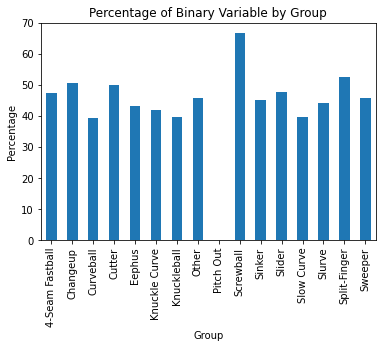

In [110]:
pitch_type_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

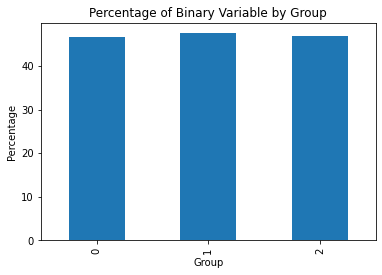

In [111]:
outs_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

In [112]:
#feature Engineering

#add on base and in scoring position

train['on_base']=train[['on_1b','on_2b','on_3b']].notna().all(axis=1).astype(int)

train['bases_empty']=train[['on_1b','on_2b','on_3b']].isna().all(axis=1).astype(int)

train['scoring_position']=train[['on_2b','on_3b']].notna().all(axis=1).astype(int)

# add to test 

test['on_base']=test[['on_1b','on_2b','on_3b']].notna().all(axis=1).astype(int)

test['bases_empty']=test[['on_1b','on_2b','on_3b']].isna().all(axis=1).astype(int)

test['scoring_position']=test[['on_2b','on_3b']].notna().all(axis=1).astype(int)

In [113]:
onbase_percentage=train.groupby('on_base')['swing'].agg('mean')*100

bases_empty_percentage=train.groupby('bases_empty')['swing'].agg('mean')*100

scoring_position_percentage=train.groupby('scoring_position')['swing'].agg('mean')*100

Text(0, 0.5, 'Percentage')

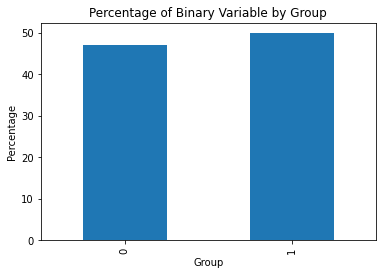

In [114]:
onbase_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

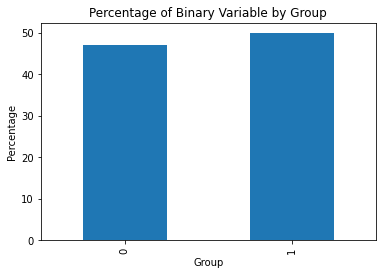

In [115]:
onbase_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

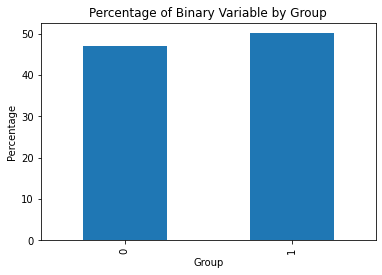

In [116]:
scoring_position_percentage.plot(kind='bar')
plt.title('Percentage of Binary Variable by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')

In [117]:
# select features X and Y
X=train[['release_speed','pfx_x','pfx_z','plate_x','plate_z','on_base','bases_empty','scoring_position','outs_when_up','inning','release_spin_rate','release_extension','if_fielding_alignment','of_fielding_alignment','pitch_name','attack_zone']]
y=train['swing']

XTest=test[['release_speed','pfx_x','pfx_z','plate_x','plate_z','on_base','bases_empty','scoring_position','outs_when_up','inning','release_spin_rate','release_extension','if_fielding_alignment','of_fielding_alignment','pitch_name','attack_zone']]



In [121]:

from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    XTest[col] = le.transform(XTest[col])



C:\Users\bcollins\AppData\Local\Temp\ipykernel_21888\1143121741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\bcollins\AppData\Local\Temp\ipykernel_21888\1143121741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XTest[col] = le.transform(XTest[col])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit and transform the min-max scaler on all numerical variables in the training and testing datasets
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
XTest[XTest.columns] = scaler.transform(XTest[XTest.columns])